#**Adult Income Dataset**

##**Importing Libraries**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Set visual theme
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


###**Load Dataset**

In [73]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(url, names=column_names, sep=',', skipinitialspace=True)

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Initial Exploration** 

#### **Checking Shape and Data types of the features** 

In [74]:
# df.shape
print("Dataset shape:", df.shape)
print("\nColumn data types:\n", df.dtypes)

Dataset shape: (32561, 15)

Column data types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


#### **Checking Missing Values** 

In [75]:
# Check for null values
print("\nMissing values:\n", df.isnull().sum())
# Check for "?" in the dataset
(df == '?').sum()


Missing values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


#### **Removing Missing Values**

In [76]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
(df == '?').sum()
#df.shape

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


#### **Stats** 

In [77]:
# Basic statistics
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#**Exploratory Data Analysis**(EDA)

### **Class Distribution (Target Variable)** 

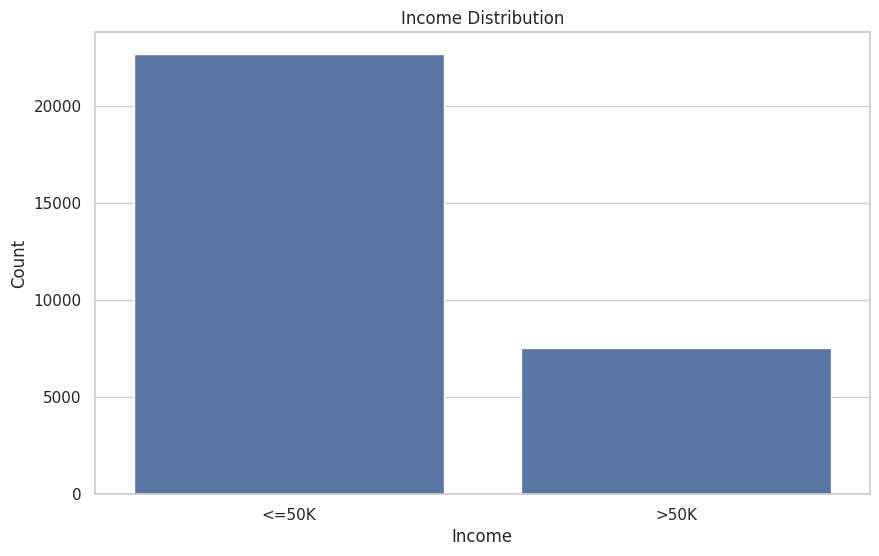

income
<=50K    22654
>50K      7508
Name: count, dtype: int64


In [78]:
# Income Distribution classes
sns.countplot(data=df, x='income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

print(df['income'].value_counts())


### **Numerical Feature Distributions**

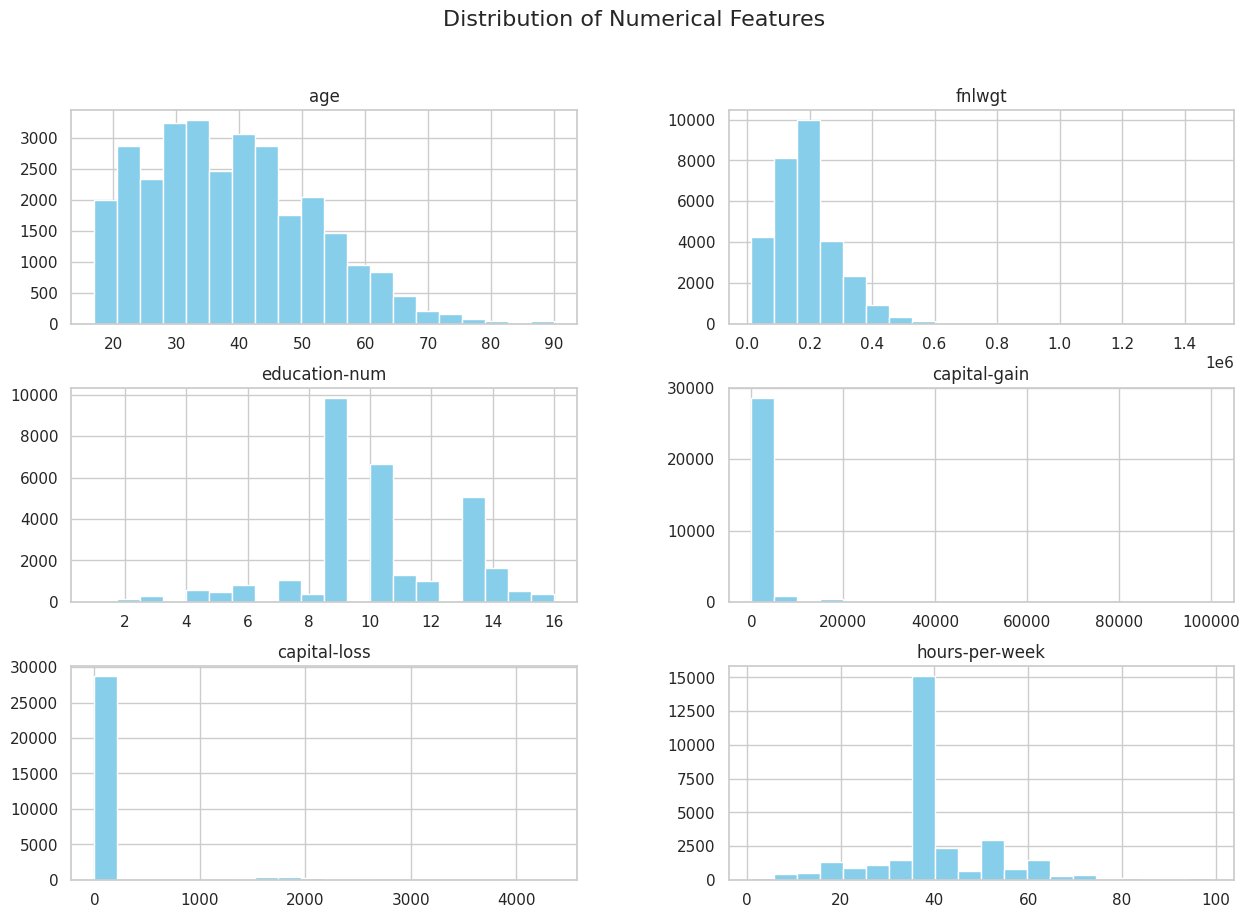

In [79]:
# Histogram Plot for numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


### **Categorical Feature Distributions**

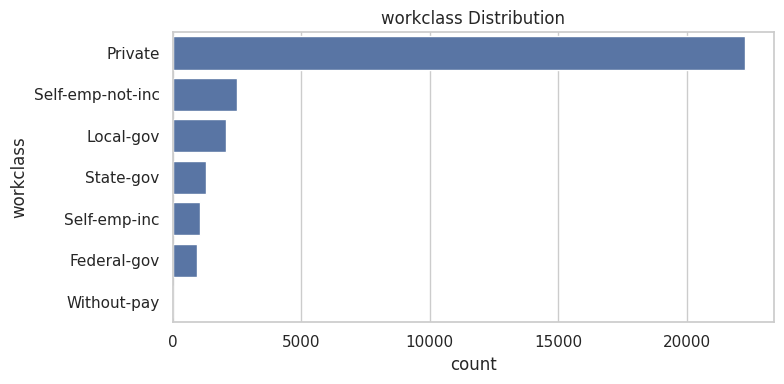

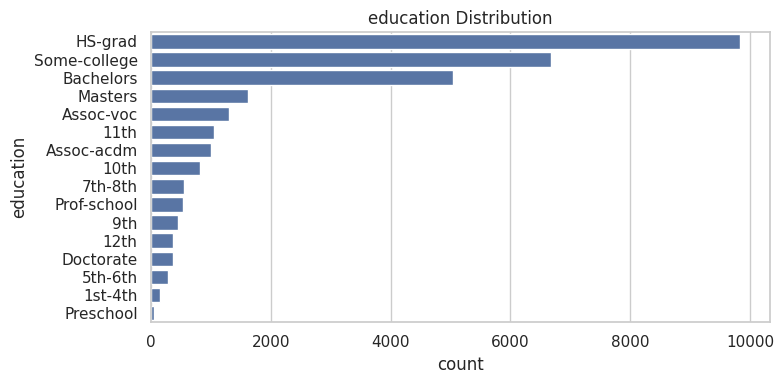

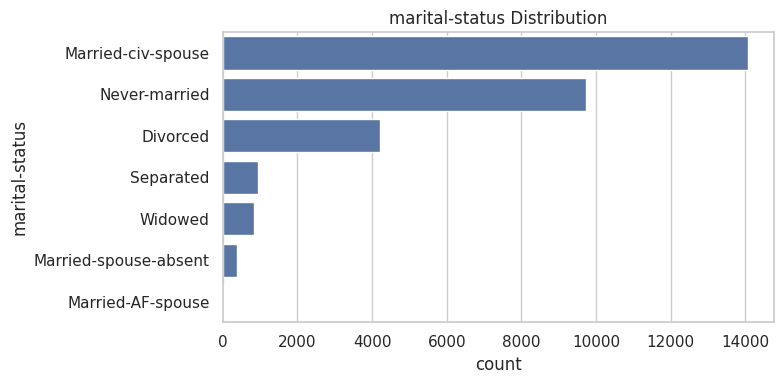

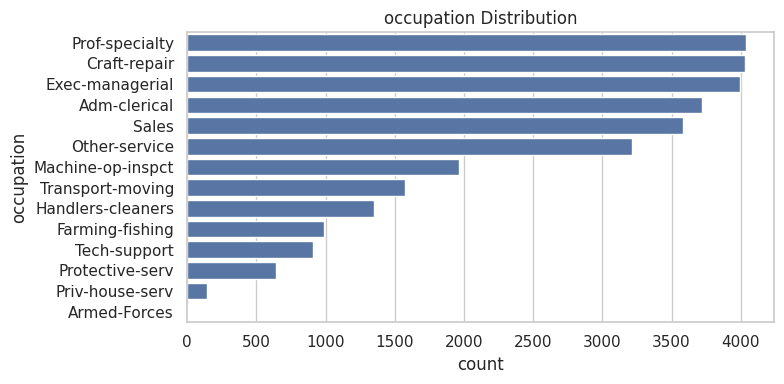

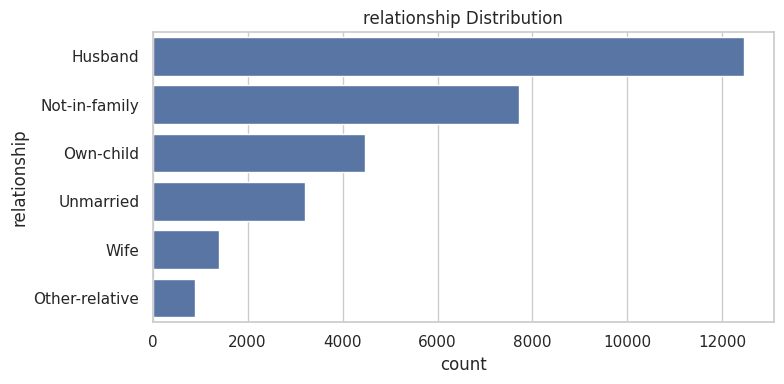

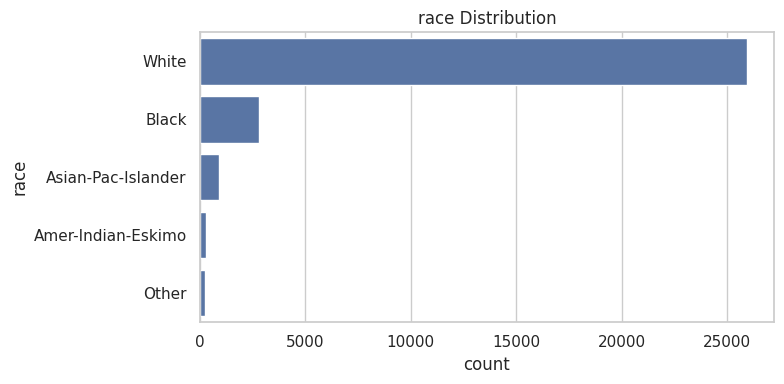

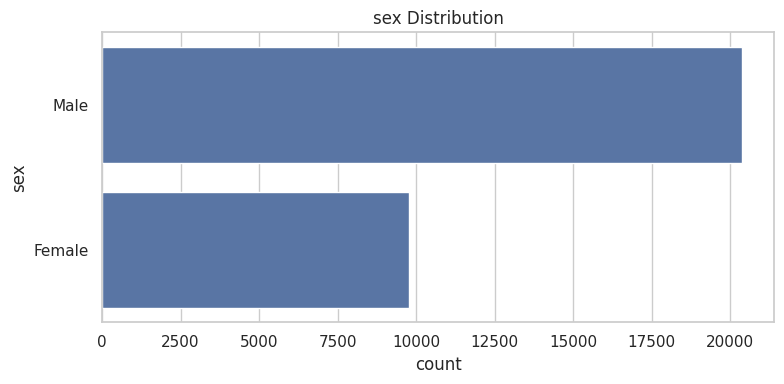

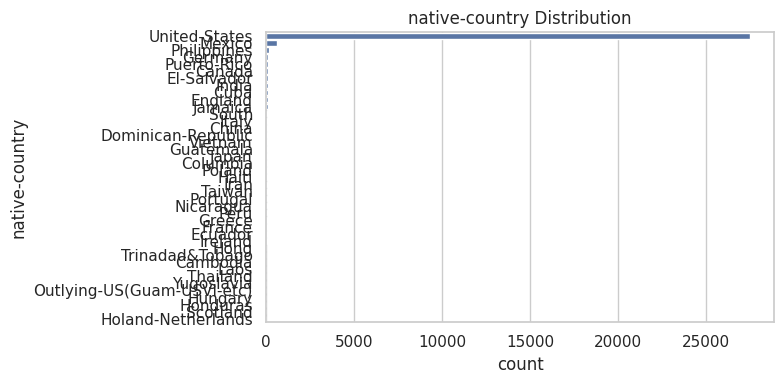

In [80]:
# Single category
cat_cols = df.select_dtypes(include=['object']).columns.drop('income')
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()


### **Relationships Between Features** 

#### **Age vs Income** 

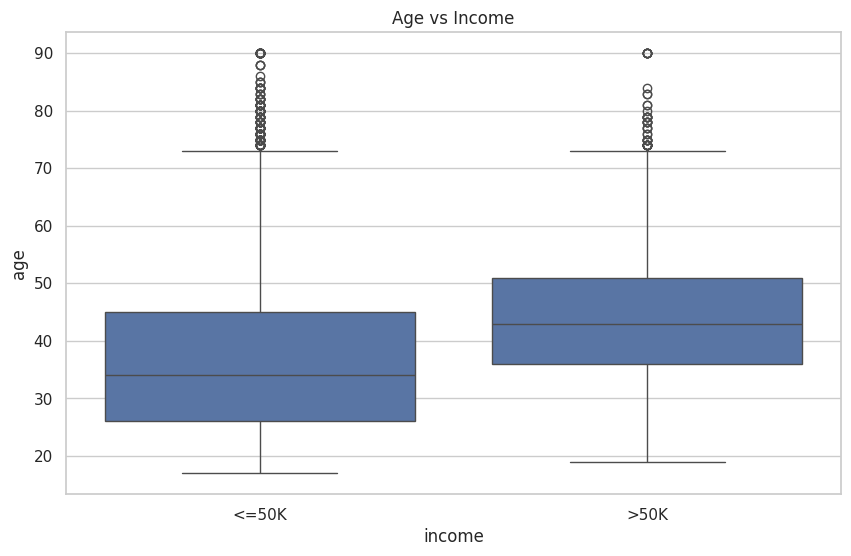

In [81]:
sns.boxplot(data=df, x='income', y='age')
plt.title('Age vs Income')
plt.show()

#### **Education vs Income** 

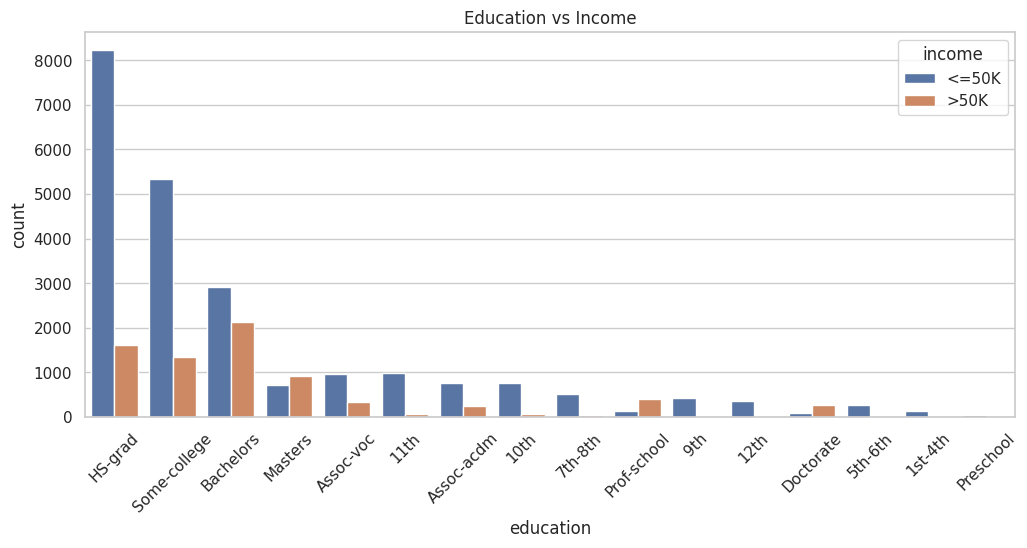

In [82]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.title('Education vs Income')
plt.xticks(rotation=45)
plt.show()


#### **Gender vs Income** 

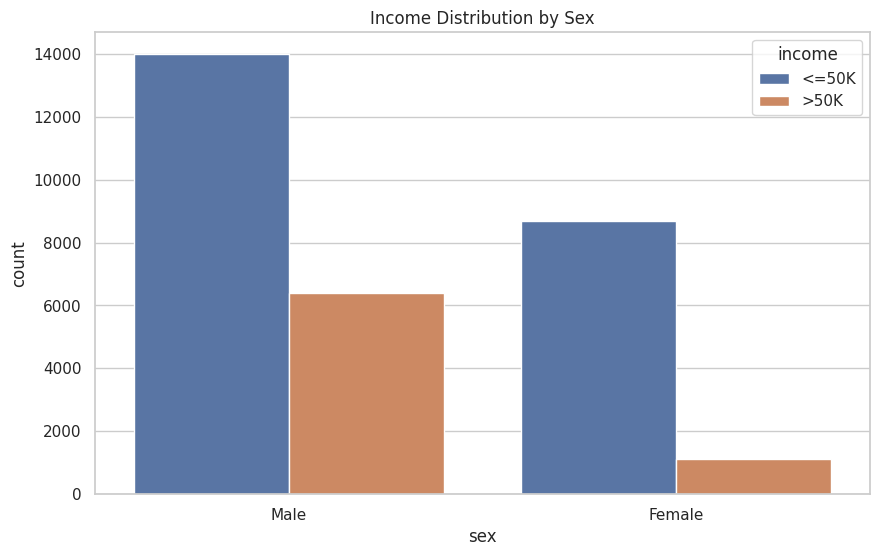

In [83]:
sns.countplot(data=df, x='sex', hue='income')
plt.title('Income Distribution by Sex')
plt.show()


# **Data Preprocessing** 

### **Encode Target Variable** 

In [84]:
# Convert income to binary
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


### **Encode Categorical Variables**

In [85]:
# Exclude 'income' from encoding
categorical_cols = df.select_dtypes(include=['object']).columns.drop('income', errors='ignore')

df_encoded = pd.get_dummies(df, columns=categorical_cols)


### **Standardize Numeric Features**

In [86]:
num_cols = ['education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

### **Train-Test Split** 

In [87]:
# Train-test split
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# **Model Training** 

## **Logistics Regression**

In [88]:
# Logistic Regression ML ALGORITHM

# lr_model = LogisticRegression(
#     solver='saga',
#     max_iter=2000,
#     random_state=42
# )
lr_model = LogisticRegression(
    solver='liblinear',
    max_iter=2000,
    random_state=42
    )

lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]



## **Random Forest**

In [89]:
# Random Forest ML ALGORITHM
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


### **Evaluation Function** 

In [90]:
def evaluate_model(y_test, y_pred, y_prob, model_name="Model"):
    print(f"Evaluation Metrics for {model_name}")
    print("-" * 40)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")
evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

📊 Evaluation Metrics for Logistic Regression
----------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4531
           1       0.00      0.00      0.00      1502

    accuracy                           0.75      6033
   macro avg       0.38      0.50      0.43      6033
weighted avg       0.56      0.75      0.64      6033

Accuracy: 0.7510359688380573
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5131796609890557
Confusion Matrix:
 [[4531    0]
 [1502    0]]


📊 Evaluation Metrics for Random Forest
----------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4531
           1       0.73      0.62      0.67      1502

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.79      6033
weighted avg       0.84      0.85      0.84      6033

Accuracy: 0.8481684070943146

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# **Hyperparameter Tuning Cross-Validation** 

### **Tune Logistic Regression**

In [69]:
#parameter grid
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# Grid Search with 5-fold cross-validation
lr_grid = GridSearchCV(LogisticRegression(max_iter=2000), lr_param_grid, cv=5, scoring='f1', verbose=1)
lr_grid.fit(X_train, y_train)

# Best model
best_lr = lr_grid.best_estimator_

# Predict using the best model
y_pred_lr_best = best_lr.predict(X_test)
y_prob_lr_best = best_lr.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model(y_test, y_pred_lr_best, y_prob_lr_best, "Best Logistic Regression")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
📊 Evaluation Metrics for Best Logistic Regression
----------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4531
           1       0.00      0.00      0.00      1502

    accuracy                           0.75      6033
   macro avg       0.38      0.50      0.43      6033
weighted avg       0.56      0.75      0.64      6033

Accuracy: 0.7510359688380573
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5131796609890557
Confusion Matrix:
 [[4531    0]
 [1502    0]]




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

### **Random Forest Tune**

In [61]:
# parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Grid Search with 3-fold CV (to reduce time)
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_

# Predict using best model
y_pred_rf_best = best_rf.predict(X_test)
y_prob_rf_best = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model(y_test, y_pred_rf_best, y_prob_rf_best, "Best Random Forest")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
📊 Evaluation Metrics for Best Random Forest
----------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4531
           1       0.77      0.62      0.69      1502

    accuracy                           0.86      6033
   macro avg       0.83      0.78      0.80      6033
weighted avg       0.85      0.86      0.85      6033

Accuracy: 0.8599370130946461
Precision: 0.7699260476581758
Recall: 0.6238348868175766
F1 Score: 0.6892239794041927
ROC AUC Score: 0.9155868391177687
Confusion Matrix:
 [[4251  280]
 [ 565  937]]




# **Model Comparison**

### **Metric Comparison**

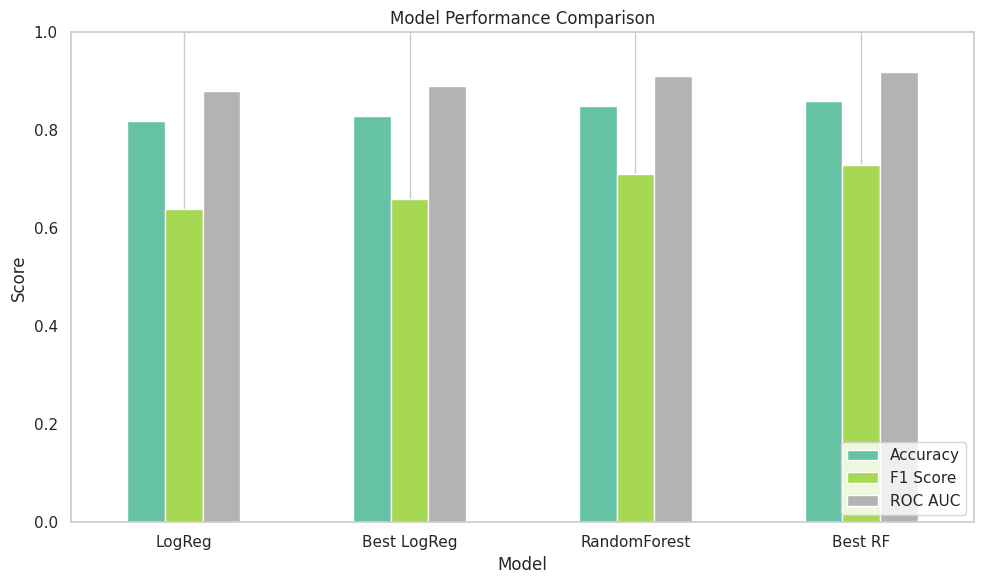

In [68]:
metrics = {
    'Model': ['LogReg', 'Best LogReg', 'RandomForest', 'Best RF'],
    'Accuracy': [0.82, 0.83, 0.85, 0.86],
    'F1 Score': [0.64, 0.66, 0.71, 0.73],
    'ROC AUC': [0.88, 0.89, 0.91, 0.92]
}


results_df = pd.DataFrame(metrics)
results_df.set_index('Model', inplace=True)

# Plotting
results_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **ROC Curves**

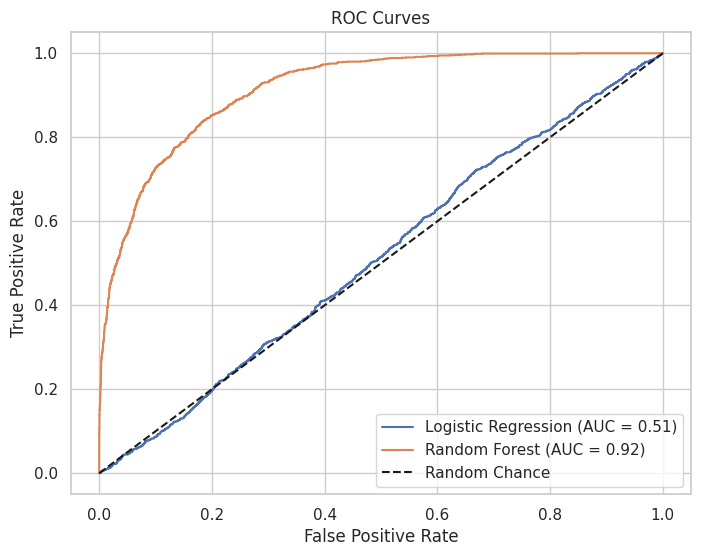

In [67]:
# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_best)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf_best)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot both
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### **Confusion Matrix Heatmaps**

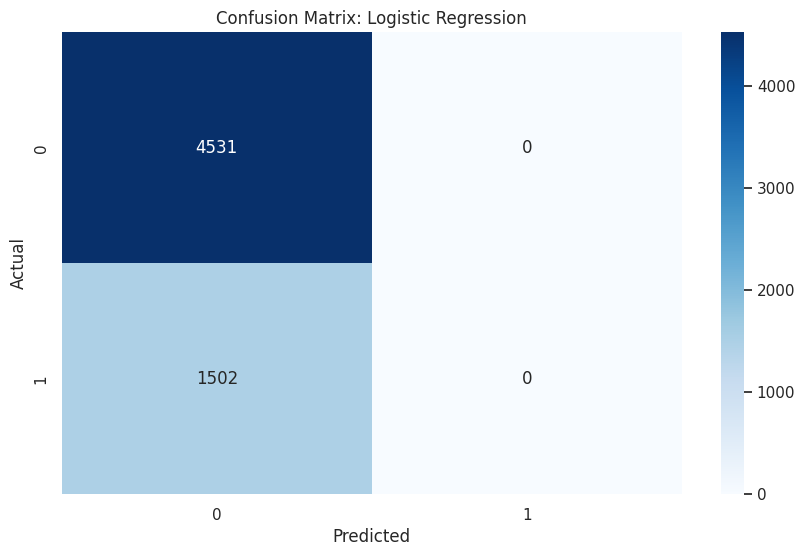

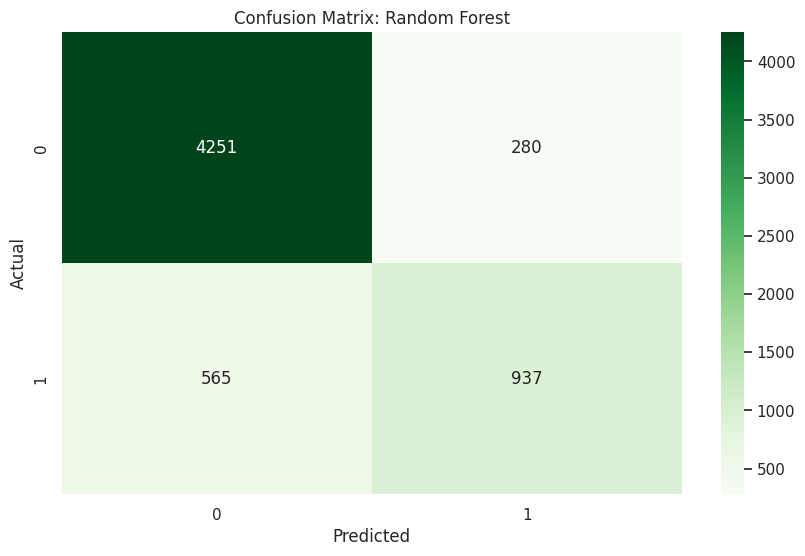

In [66]:

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr_best)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf_best)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
